This script takes a trained model and confronts the performance of the CNN+MLP model with a CNN+KNN model

In [33]:
# Import packages
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from keras.utils import to_categorical
from keras.layers import Dense, Convolution1D, Convolution2D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model, Sequential
#from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.utils import resample
import warnings
import os

In [34]:
# Load data from file
train_df=pd.read_csv('src/mitbih_train.csv',header=None)
test_df=pd.read_csv('src/mitbih_test.csv',header=None)

# Create data and labels from dataset
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)



##############################
### MODEL 24 ###



Model: "functional_452"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 38, 4)          │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 1)           │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2    3      4
0  0.929  0.462  0.092  0.0  0.007
1  0.027  0.423  0.028  0.0  0.000
2  0.026  0.115  0.854  0.0  0.004
3  0.008  0.000  0.005  0.0  0.001
4  0.011  0.000  0.020  0.0  0.989
Average accuracy
0.6389539933144986

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.956  0.217  0.079  0.338  0.020
1  0.015  0.755  0.011  0.000  0.000
2  0.015  0.028  0.890  0.141  0.009
3  0.006  0.000  0.012  0.521  0.001
4  0.008  0.000  0.009  0.000  0.971
Average accuracy
0.8186101824936876


##############################
### MODEL 25 ###



Model: "functional_460"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 2, 4)           │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0    1      2    3      4
0  0.881  0.0  0.341  0.0  0.078
1  0.026  0.0  0.059  0.0  0.009
2  0.064  0.0  0.512  0.0  0.049
3  0.008  0.0  0.006  0.0  0.000
4  0.021  0.0  0.082  0.0  0.865
Average accuracy
0.45153269738512414

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.956  0.204  0.120  0.198  0.033
1  0.012  0.752  0.008  0.010  0.005
2  0.019  0.029  0.847  0.083  0.012
3  0.005  0.002  0.005  0.708  0.000
4  0.008  0.012  0.021  0.000  0.951
Average accuracy
0.8426483755310482


##############################
### MODEL 26 ###



Model: "functional_467"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 27, 1)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 13, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 13)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0    1    2    3      4
0  0.885  0.0  0.0  0.0  0.133
1  0.027  0.0  0.0  0.0  0.002
2  0.063  0.0  0.0  0.0  0.102
3  0.008  0.0  0.0  0.0  0.001
4  0.016  0.0  0.0  0.0  0.763
Average accuracy
0.32968398241936825

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.969  0.131  0.048  0.110  0.014
1  0.012  0.848  0.004  0.008  0.001
2  0.011  0.021  0.934  0.126  0.005
3  0.003  0.000  0.010  0.756  0.001
4  0.006  0.000  0.005  0.000  0.979
Average accuracy
0.8971047982352877


##############################
### MODEL 27 ###



Model: "functional_474"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 93, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 18, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 18)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0     1      2      3      4
0  0.938  0.42  0.128  0.094  0.049
1  0.025  0.50  0.028  0.012  0.001
2  0.021  0.08  0.809  0.247  0.012
3  0.005  0.00  0.004  0.647  0.000
4  0.011  0.00  0.031  0.000  0.939
Average accuracy
0.7666072531614847

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.968  0.123  0.066  0.124  0.024
1  0.011  0.854  0.011  0.008  0.001
2  0.012  0.018  0.900  0.132  0.009
3  0.003  0.000  0.012  0.736  0.000
4  0.007  0.005  0.011  0.000  0.966
Average accuracy
0.8848912364821369


##############################
### MODEL 28 ###



Model: "functional_483"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 38, 1)          │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 4)           │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0    1      2    3      4
0  0.924  0.0  0.131  0.5  0.147
1  0.027  0.0  0.035  0.0  0.001
2  0.031  0.0  0.770  0.0  0.026
3  0.007  0.0  0.031  0.5  0.001
4  0.011  0.0  0.031  0.0  0.826
Average accuracy
0.6041009671882314

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.939  0.269  0.106  0.403  0.094
1  0.018  0.667  0.014  0.015  0.000
2  0.023  0.061  0.841  0.134  0.023
3  0.007  0.000  0.009  0.418  0.001
4  0.013  0.003  0.029  0.030  0.882
Average accuracy
0.7494000967669379


##############################
### MODEL 29 ###



Model: "functional_491"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 186, 5)         │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 1)          │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 11)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.949  0.049  0.066  0.323  0.017
1  0.016  0.951  0.024  0.000  0.001
2  0.021  0.000  0.875  0.169  0.051
3  0.007  0.000  0.004  0.508  0.000
4  0.008  0.000  0.031  0.000  0.931
Average accuracy
0.8426655959239475

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.962  0.065  0.073  0.237  0.013
1  0.012  0.915  0.008  0.000  0.000
2  0.014  0.020  0.883  0.134  0.017
3  0.005  0.000  0.007  0.629  0.001
4  0.007  0.000  0.029  0.000  0.970
Average accuracy
0.8717049109484222


##############################
### MODEL 30 ###



Model: "functional_500"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 10, 3)          │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 1)           │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2    3      4
0  0.937  0.215  0.047  0.0  0.089
1  0.018  0.582  0.029  0.0  0.002
2  0.024  0.203  0.901  0.0  0.050
3  0.008  0.000  0.004  0.0  0.000
4  0.012  0.000  0.018  0.0  0.859
Average accuracy
0.6559439051917146

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2    3      4
0  0.938  0.162  0.065  1.0  0.078
1  0.016  0.746  0.029  0.0  0.002
2  0.025  0.092  0.868  0.0  0.040
3  0.008  0.000  0.003  0.0  0.000
4  0.013  0.000  0.035  0.0  0.880
Average accuracy
0.6863783159018907


##############################
### MODEL 31 ###



Model: "functional_506"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 46)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.967  0.048  0.050  0.134  0.015
1  0.014  0.892  0.013  0.000  0.001
2  0.012  0.057  0.917  0.187  0.008
3  0.003  0.000  0.011  0.679  0.001
4  0.005  0.003  0.009  0.000  0.975
Average accuracy
0.8858176403712816

CNN + KNN performance
--------------------
Num Neighbors: 4
Confusion matrix
       0      1      2      3      4
0  0.973  0.078  0.023  0.066  0.007
1  0.011  0.908  0.005  0.008  0.001
2  0.008  0.013  0.954  0.131  0.002
3  0.003  0.000  0.009  0.795  0.000
4  0.005  0.000  0.008  0.000  0.990
Average accuracy
0.9241356597582773


##############################
### MODEL 32 ###



Model: "functional_513"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 62, 1)          │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2    3      4
0  0.933  0.262  0.130  0.0  0.039
1  0.015  0.697  0.019  0.0  0.000
2  0.036  0.041  0.796  0.0  0.028
3  0.007  0.000  0.027  1.0  0.001
4  0.010  0.000  0.028  0.0  0.933
Average accuracy
0.8717482498053073

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.966  0.158  0.073  0.111  0.015
1  0.012  0.803  0.008  0.000  0.001
2  0.012  0.037  0.891  0.154  0.014
3  0.003  0.000  0.018  0.735  0.001
4  0.007  0.002  0.011  0.000  0.969
Average accuracy
0.872734564579648


##############################
### MODEL 33 ###



Model: "functional_520"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 27, 3)          │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 5)           │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 20)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74 (296.00 B)

 Trainable params: 74 (296.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.962  0.183  0.111  0.179  0.014
1  0.013  0.808  0.024  0.000  0.001
2  0.011  0.006  0.826  0.161  0.006
3  0.006  0.000  0.012  0.661  0.000
4  0.009  0.003  0.028  0.000  0.980
Average accuracy
0.8472186016908008

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.965  0.105  0.059  0.104  0.015
1  0.013  0.867  0.011  0.000  0.001
2  0.012  0.025  0.910  0.115  0.017
3  0.004  0.003  0.009  0.781  0.000
4  0.007  0.000  0.011  0.000  0.967
Average accuracy
0.8981206701558954


##############################
### MODEL 34 ###



Model: "functional_527"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 10, 2)          │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 20)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.966  0.080  0.063  0.218  0.032
1  0.013  0.907  0.011  0.000  0.002
2  0.011  0.012  0.892  0.103  0.006
3  0.004  0.000  0.017  0.678  0.001
4  0.006  0.000  0.017  0.000  0.958
Average accuracy
0.8804098184172169

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.973  0.072  0.025  0.181  0.008
1  0.011  0.909  0.006  0.000  0.001
2  0.008  0.019  0.951  0.102  0.004
3  0.003  0.000  0.009  0.717  0.001
4  0.005  0.000  0.008  0.000  0.987
Average accuracy
0.9072883557039371


##############################
### MODEL 35 ###



Model: "functional_534"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 38, 3)          │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 3)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 21)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30 (120.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.970  0.279  0.073  0.245  0.013
1  0.011  0.708  0.023  0.000  0.001
2  0.010  0.007  0.875  0.210  0.012
3  0.004  0.002  0.011  0.545  0.001
4  0.006  0.004  0.018  0.000  0.974
Average accuracy
0.8143067631949142

CNN + KNN performance
--------------------
Num Neighbors: 5
Confusion matrix
       0      1      2      3      4
0  0.977  0.099  0.032  0.133  0.010
1  0.011  0.888  0.007  0.000  0.000
2  0.007  0.013  0.938  0.140  0.008
3  0.002  0.000  0.013  0.720  0.000
4  0.004  0.000  0.010  0.007  0.982
Average accuracy
0.9010371903952734


##############################
### MODEL 36 ###



Model: "functional_542"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 27, 2)          │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 5)           │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.955  0.106  0.139  0.000  0.011
1  0.013  0.894  0.022  0.000  0.001
2  0.018  0.000  0.785  0.444  0.010
3  0.006  0.000  0.029  0.556  0.001
4  0.008  0.000  0.026  0.000  0.977
Average accuracy
0.8331947543841809

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.963  0.071  0.097  0.271  0.023
1  0.012  0.901  0.012  0.014  0.001
2  0.014  0.028  0.854  0.214  0.015
3  0.005  0.000  0.022  0.471  0.001
4  0.007  0.000  0.016  0.029  0.959
Average accuracy
0.8296800070623517


##############################
### MODEL 37 ###



Model: "functional_549"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 27, 5)          │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 5)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 25)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.966  0.178  0.045  0.034  0.009
1  0.012  0.806  0.017  0.000  0.003
2  0.010  0.013  0.916  0.172  0.010
3  0.005  0.000  0.013  0.793  0.000
4  0.006  0.003  0.008  0.000  0.978
Average accuracy
0.8919675899997752

CNN + KNN performance
--------------------
Num Neighbors: 6
Confusion matrix
       0      1      2      3      4
0  0.974  0.073  0.036  0.127  0.014
1  0.011  0.911  0.006  0.008  0.003
2  0.006  0.016  0.932  0.119  0.004
3  0.003  0.000  0.012  0.746  0.000
4  0.005  0.000  0.014  0.000  0.980
Average accuracy
0.9085217349202995


##############################
### MODEL 38 ###



Model: "functional_556"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 23)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.936  0.222  0.108  0.042  0.038
1  0.024  0.741  0.039  0.000  0.001
2  0.021  0.037  0.830  0.458  0.008
3  0.007  0.000  0.004  0.500  0.000
4  0.011  0.000  0.018  0.000  0.953
Average accuracy
0.7919091489918173

CNN + KNN performance
--------------------
Num Neighbors: 5
Confusion matrix
       0      1      2      3      4
0  0.971  0.094  0.041  0.080  0.013
1  0.011  0.898  0.009  0.008  0.001
2  0.010  0.008  0.930  0.112  0.006
3  0.003  0.000  0.010  0.800  0.000
4  0.006  0.000  0.010  0.000  0.981
Average accuracy
0.9159089501437464


##############################
### MODEL 39 ###



Model: "functional_563"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 62, 1)          │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 12)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.954  0.361  0.109  0.127  0.029
1  0.012  0.628  0.031  0.000  0.002
2  0.020  0.009  0.823  0.380  0.020
3  0.005  0.002  0.018  0.494  0.001
4  0.009  0.000  0.019  0.000  0.948
Average accuracy
0.7691893774006313

CNN + KNN performance
--------------------
Num Neighbors: 6
Confusion matrix
       0      1      2      3      4
0  0.963  0.110  0.099  0.173  0.027
1  0.013  0.878  0.016  0.010  0.001
2  0.013  0.009  0.847  0.173  0.016
3  0.004  0.003  0.021  0.643  0.000
4  0.007  0.000  0.016  0.000  0.956
Average accuracy
0.8573723171924689


##############################
### MODEL 40 ###



Model: "functional_569"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 31)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.961  0.077  0.068  0.071  0.022
1  0.013  0.895  0.023  0.000  0.001
2  0.015  0.029  0.881  0.155  0.010
3  0.004  0.000  0.010  0.774  0.001
4  0.006  0.000  0.017  0.000  0.967
Average accuracy
0.8955286286938895

CNN + KNN performance
--------------------
Num Neighbors: 3
Confusion matrix
       0      1      2      3      4
0  0.976  0.114  0.043  0.085  0.006
1  0.010  0.876  0.009  0.014  0.001
2  0.007  0.007  0.930  0.128  0.006
3  0.002  0.000  0.010  0.773  0.000
4  0.004  0.002  0.008  0.000  0.987
Average accuracy
0.9085565539075354


##############################
### MODEL 41 ###



Model: "functional_576"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 62, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0      1      2      3      4
0  0.947  0.170  0.147  0.314  0.046
1  0.014  0.814  0.026  0.000  0.000
2  0.024  0.013  0.789  0.257  0.022
3  0.007  0.000  0.014  0.371  0.001
4  0.008  0.003  0.024  0.057  0.931
Average accuracy
0.7704552713901895

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.961  0.153  0.114  0.295  0.032
1  0.013  0.827  0.011  0.000  0.000
2  0.014  0.016  0.836  0.105  0.021
3  0.005  0.000  0.012  0.589  0.001
4  0.007  0.003  0.026  0.011  0.946
Average accuracy
0.8321867645037966


##############################
### MODEL 42 ###



Model: "functional_582"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 31)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0     1      2      3      4
0  0.923  0.25  0.143  0.000  0.072
1  0.027  0.75  0.036  0.000  0.001
2  0.031  0.00  0.775  0.667  0.038
3  0.008  0.00  0.004  0.333  0.000
4  0.011  0.00  0.042  0.000  0.890
Average accuracy
0.7341977930260057

CNN + KNN performance
--------------------
Num Neighbors: 3
Confusion matrix
       0      1      2      3      4
0  0.976  0.114  0.043  0.085  0.006
1  0.010  0.876  0.009  0.014  0.001
2  0.007  0.007  0.930  0.128  0.006
3  0.002  0.000  0.010  0.773  0.000
4  0.004  0.002  0.008  0.000  0.987
Average accuracy
0.9085565539075354


##############################
### MODEL 43 ###



Model: "functional_590"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 27, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 2)           │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0    1    2    3      4
0  0.908  0.0  0.0  0.0  0.243
1  0.027  0.0  0.0  0.0  0.014
2  0.048  0.0  0.0  0.0  0.197
3  0.007  0.0  0.0  0.0  0.013
4  0.010  0.0  0.0  0.0  0.532
Average accuracy
0.2881083145238943

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.909  0.167  0.251  0.000  0.111
1  0.026  0.000  0.026  0.000  0.013
2  0.042  0.333  0.457  0.143  0.166
3  0.007  0.000  0.017  0.286  0.010
4  0.016  0.500  0.250  0.571  0.700
Average accuracy
0.47024066585098223


##############################
### MODEL 44 ###



C:\Users\umber\AppData\Local\Temp\ipykernel_10820\4145369611.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figsize=(4, 4))


Model: "functional_599"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_cnn (InputLayer)         │ (None, 186, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 186, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 46, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 9, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 4)           │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat_1 (Flatten)                │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68 (272.00 B)

 Trainable params: 68 (272.00 B)

 Non-trainable params: 0 (0.00 B)

Original model performance
--------------------
Confusion matrix
       0    1    2    3    4
0  0.828  0.0  0.0  0.0  0.0
1  0.025  0.0  0.0  0.0  0.0
2  0.066  0.0  0.0  0.0  0.0
3  0.007  0.0  0.0  0.0  0.0
4  0.073  0.0  0.0  0.0  0.0
Average accuracy
0.16552165174492967

CNN + KNN performance
--------------------
Num Neighbors: 7
Confusion matrix
       0      1      2      3      4
0  0.948  0.187  0.135  0.287  0.073
1  0.013  0.776  0.006  0.011  0.005
2  0.021  0.021  0.825  0.117  0.020
3  0.005  0.000  0.011  0.564  0.001
4  0.013  0.016  0.023  0.021  0.900
Average accuracy
0.8026312495875295


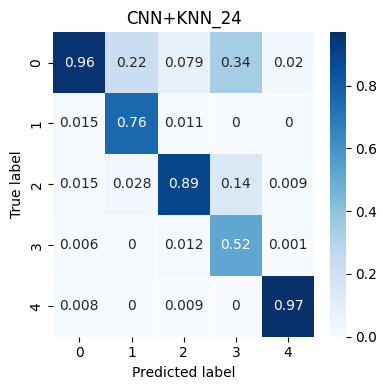

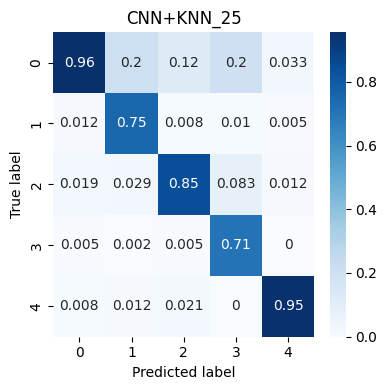

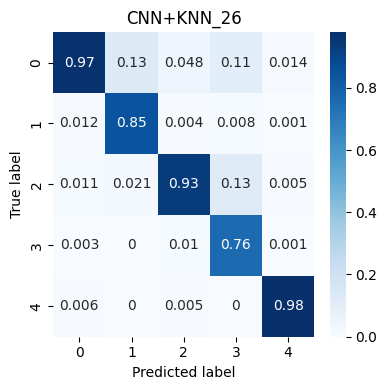

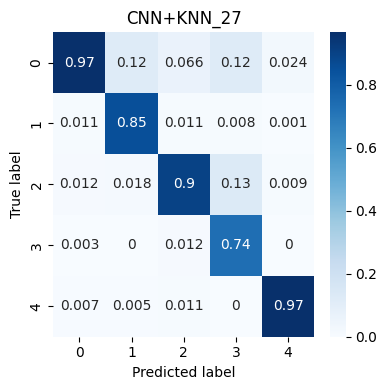

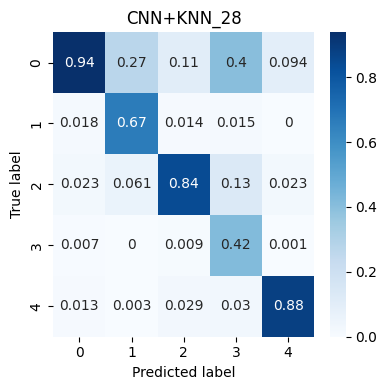

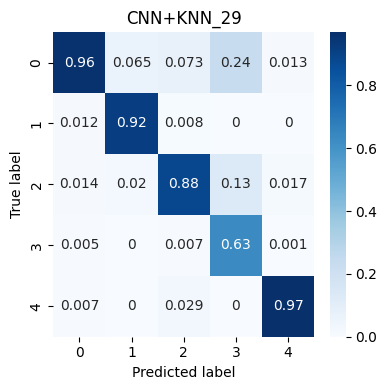

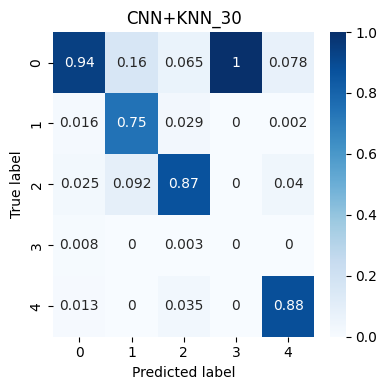

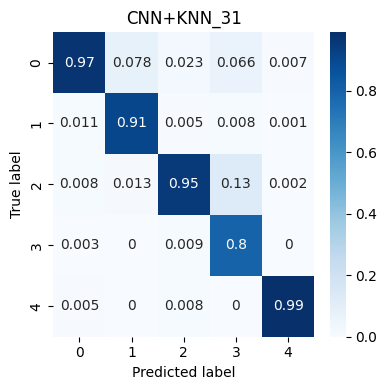

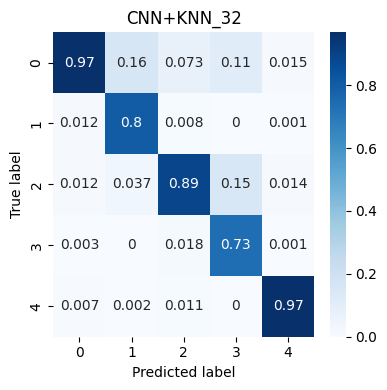

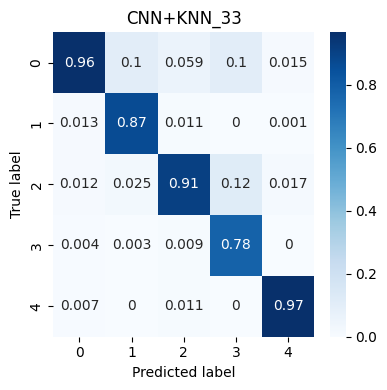

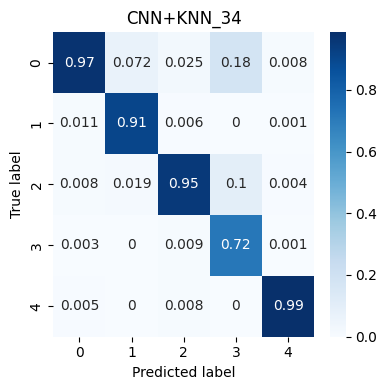

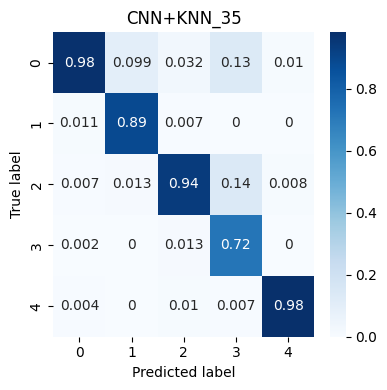

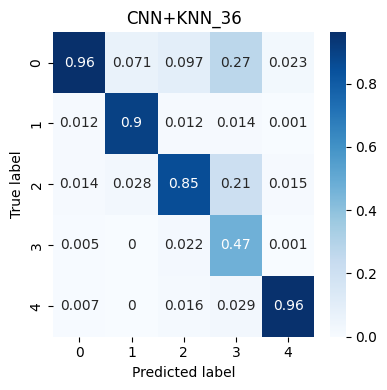

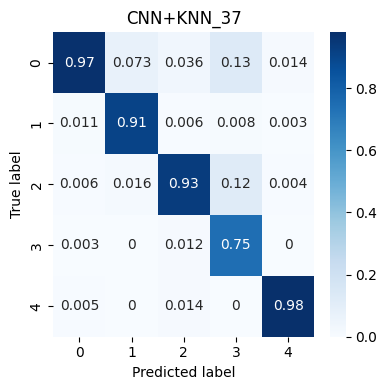

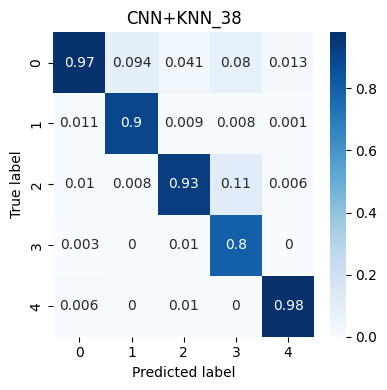

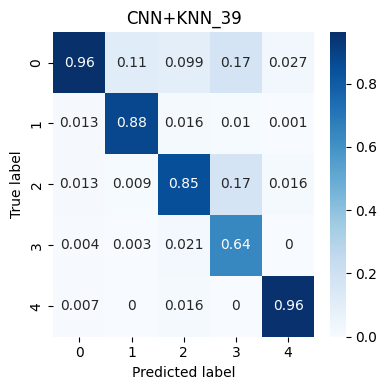

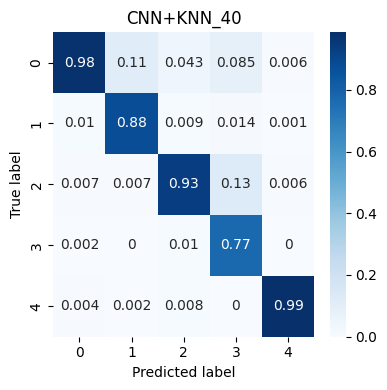

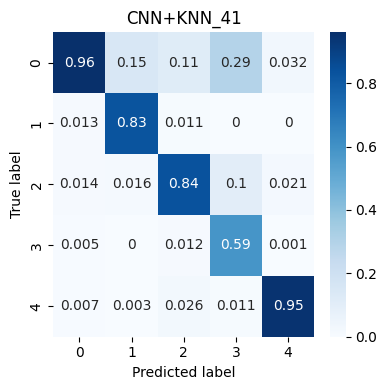

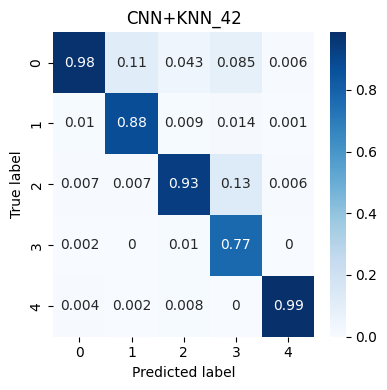

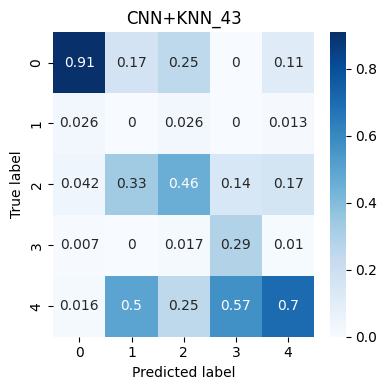

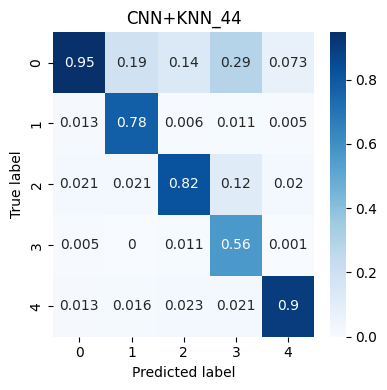

In [35]:
model_num = 24
model_path = 'models/cnn/model_' + f"{model_num:02}" + '.keras'
while os.path.exists(model_path):

    # Load complete model 
    model = keras.models.load_model(model_path)
    #model.summary()

    # Calculate performance or complete model
    y_prediction_cnn = model.predict(X_test, verbose=0)
    y_prediction_cnn = np.argmax (y_prediction_cnn, axis = 1)
    y_test_cnn=np.argmax(y_test, axis=1)

    # Create confusion matrix and normalize it over predicted (columns)
    result_cnn = confusion_matrix(y_test_cnn, y_prediction_cnn , normalize='pred')
    classes = [0,1,2,3,4]
    result_cnn_norm = np.around(result_cnn, 3)
    mat_result_cnn = pd.DataFrame(result_cnn_norm,
                        index = classes, 
                        columns = classes)
    total_pred_cnn = np.trace(result_cnn) / 5

    # Extract submodel ending at last convolution layer
    for n in range(len(model.layers)-1, 0, -1):
        layer = model.layers[n]
        # Skip if not convolution
        if 'flat' not in layer.name:     #if 'conv' not in layer.name:
            continue
        # Define submodel ending at current convolution layer
        mymodel = Model(inputs=model.inputs, outputs=model.layers[n].output)
        break

    # Generate dataset from the output of submodel
    #print(mymodel.predict(X_test, verbose=0))
    X_test_knn = mymodel.predict(X_test, verbose=0)#[:,:,0]
    X_train_knn = mymodel.predict(X_train, verbose=0)#[:,:,0]

    # Train KNN network for different number of neighbors
    knn_r_acc = []
    for num_neighbors in range(3, 8):
        # Define KNN
        knn_model = KNeighborsRegressor(n_neighbors=num_neighbors)
        # Train KNN model
        knn_model.fit(X_train_knn, y_train)
        # Extract trained model scores
        train_score = knn_model.score(X_train_knn,y_train)
        test_score = knn_model.score(X_test_knn,y_test)
        # Store scores
        knn_r_acc.append((num_neighbors, test_score ,train_score))
    df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

    # Predict with best KNN
    best_neigh = int(df.iloc[df['Test Score'].idxmax()]['K'])
    knn_best = KNeighborsRegressor(n_neighbors=best_neigh)
    knn_best.fit(X_train_knn, y_train)

    # Calculate performance of best KNN
    y_prediction_knn = knn_best.predict(X_test_knn)
    y_prediction_knn = np.argmax(y_prediction_knn, axis = 1)
    y_test_knn=np.argmax(y_test, axis=1)

    # Create confusion matrix and normalize it over predicted (columns)
    result_knn = confusion_matrix(y_test_knn, y_prediction_knn , normalize='pred')
    classes = [0,1,2,3,4]
    result_knn_norm = np.around(result_knn, 3)
    mat_result_knn = pd.DataFrame(result_knn_norm,
                        index = classes, 
                        columns = classes)
    total_pred_knn = np.trace(result_knn) / 5

    # Print confusion matrix to image
    model_name = "CNN+KNN_" + f"{model_num:02}"
    log_dir = "logs/cnn+knn/"
    figure = plt.figure(figsize=(4, 4))
    sns.heatmap(mat_result_knn, annot=True,cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(log_dir + '/' + model_name + '.png', pad_inches=0.1)
    #plt.show()

    # Print results
    print()
    print()
    print("##############################")
    print("### MODEL " + f"{model_num:02}" + " ###")
    print()
    mymodel.summary()
    print("Original model performance")
    print("--------------------")
    print('Confusion matrix')
    print(mat_result_cnn)
    print('Average accuracy')
    print(total_pred_cnn)
    print()
    print("CNN + KNN performance")
    print("--------------------")
    print("Num Neighbors: " + str(best_neigh))
    print('Confusion matrix')
    print(mat_result_knn)
    print('Average accuracy')
    print(total_pred_knn)

    model_num += 1
    model_path = 'models/cnn/model_' + f"{model_num:02}" + '.keras'


